In [29]:
import tensorflow as tf  
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
import os             
import cv2     

In [30]:
print("Training categories",os.listdir(r"train"))
print("Testing categories",os.listdir(r"test"))


Training categories ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Testing categories ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [32]:
category_list=os.listdir(r"train")         # storing the available classes OR labels

In [33]:
import matplotlib.pyplot as plt  

Visualizing category :  angry --------------------------------------
train\angry\Training_10118481.jpg
Visualizing category :  disgust --------------------------------------
train\disgust\Training_10371709.jpg
Visualizing category :  fear --------------------------------------
train\fear\Training_10018621.jpg
Visualizing category :  happy --------------------------------------
train\happy\Training_10019449.jpg
Visualizing category :  neutral --------------------------------------
train\neutral\Training_10002154.jpg
Visualizing category :  sad --------------------------------------
train\sad\Training_10022789.jpg
Visualizing category :  surprise --------------------------------------
train\surprise\Training_10013223.jpg


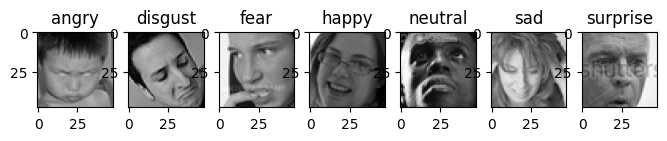

In [35]:
#picking one image from every class in training and visualizing it in a row side by side by using title to display img with label
train_base_dir="train"
fig=plt.figure(figsize=(8,8))
i=1                                 
for category in category_list:                                                          #pick one category out of all
    print("Visualizing category : ",category,"--------------------------------------")
    category_path=os.path.join(train_base_dir,category)     #using os to create the path
    flag=False                                              #using false, later changing value to break out of loop
    for img_name in os.listdir(category_path):              #pick img_name from what are available in category folder
        if(flag):
            break                                           #checking if this is the first time
#         print(os.path.join(category_path,img_name))
        img_path=os.path.join(category_path,img_name)       #getting img_path by adding img_name and category_path
        img_bgr=cv2.imread(img_path)                        #reading img by opencv, default read in BGR format
        print(img_path)
        img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)     #matplotlib display img in RGB format so convert color
        plt.subplot(1,7,i)                                  #subplot in a row(we already know it has 7 categories)
        plt.imshow(img_rgb)                                 #show img
        plt.title(category)                                 #add title                         
        flag=True                                           #changes val of flag so next time it breaks the loop
        i=i+1
plt.show() # display the result

In [36]:
#creating the imagedatagenerator, used to read and augment images
train_data_gen=ImageDataGenerator(
    rotation_range=10,             
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./255)        

In [37]:
test_data_gen=ImageDataGenerator(rescale=1./255)   #in real world test data is not given before hand, we never touch test data, only normalize it

In [38]:
train_data=train_data_gen.flow_from_directory(
    directory=train_base_dir,
    target_size=(224, 224),           #taking size as (224,224) as while using our fine tuning the arch has input shape as (224,244)
    class_mode='sparse',
    batch_size=32,
#     color_mode="grayscale"         # NO grayscale, the arch need 3 channel images ->(224,224,3)
)

Found 28709 images belonging to 7 classes.


In [39]:

train_data

In [41]:
test_data=test_data_gen.flow_from_directory(
    directory="test",
    target_size=(224, 224),          #taking size as (224,224) as while using our fine tuning the arch has input shape as (224,244)
    class_mode='sparse',
    batch_size=32,                   # NO grayscale, the arch need 3 channel images ->(224,224,3)
#     color_mode="grayscale"
)

Found 7178 images belonging to 7 classes.


In [42]:
class_indices = train_data.class_indices
category_mapping = {v: k for k, v in class_indices.items()}
# {0: 'angry',
#  1: 'disgust',
#  2: 'fear',
#  3: 'happy',
#  4: 'neutral',
#  5: 'sad',
#  6: 'surprise'}
category_mapping

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [43]:
model=tf.keras.applications.MobileNetV3Large()

c:\Users\Akruti patel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\applications\mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


22661472/22661472 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [44]:
# display model summary
model.summary()

Model: "MobileNetV3Large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, None,      │        432 │ rescaling[0][0]   │
│                     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, None,      │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ conv_bn[0][0]     │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, None,      │          0 │ expanded_conv_de… │
│                     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, None,      │          0 │ activation[0][0], │
│ (Add)               │ None, 16)         │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, None,      │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, None,      │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, None,      │          0 │ expanded_conv_1_… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, None,      │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, None,      │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, None,      │        256 │ expanded_conv_1_

 Total params: 5,507,432 (21.01 MB)

 Trainable params: 5,483,032 (20.92 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [45]:
for layer in model.layers[:20]:
    layer.trainable = False

In [48]:
#for visualization ploting the model
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [49]:
#total number of layers in the model
len(model.layers)

194

In [50]:
#layer 1->index 0
model.layers[0]

<InputLayer name=input_layer_1, built=True>

In [51]:
model.layers[-1].output

<KerasTensor shape=(None, 1000), dtype=float32, sparse=False, ragged=False, name=keras_tensor_220>

In [52]:
#adding some ANN layers at last
output=model.layers[-1].output
output=BatchNormalization()(output)
output=Dense(128)(output)
output=BatchNormalization()(output)
# output=Dense(64,activation="relu")(output)
output=Dense(7,activation="softmax")(output)

In [53]:
#saving new_model
new_model=tf.keras.Model(inputs=model.input, outputs=output)

In [54]:
# fine tuning needs smaller learning rates !!
from keras.optimizers import Adam
adam=Adam(learning_rate=0.0001)

In [55]:
#compiling the model
new_model.compile(
    optimizer=adam,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [57]:
#used to stop early if no improvement on test/validation data-> prevent overfitting 
earlystop=EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='min',
    restore_best_weights=True,
)
#reducing lear
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',       
    factor=0.2, 
    patience=3,
)

In [58]:
import warnings 
warnings.filterwarnings('ignore')   

In [59]:
history=new_model.fit(
    train_data,
    epochs=10,
    callbacks=[earlystop,reduce_lr],
    validation_data=test_data
)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2454s 3s/step - accuracy: 0.3626 - loss: 1.7149 - val_accuracy: 0.2456 - val_loss: 1.9891 - learning_rate: 1.0000e-04
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1718s 2s/step - accuracy: 0.5374 - loss: 1.2370 - val_accuracy: 0.2728 - val_loss: 1.8484 - learning_rate: 1.0000e-04
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1584s 2s/step - accuracy: 0.5826 - loss: 1.1141 - val_accuracy: 0.4086 - val_loss: 1.5168 - learning_rate: 1.0000e-04
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1385s 2s/step - accuracy: 0.6142 - loss: 1.0330 - val_accuracy: 0.4614 - val_loss: 1.3937 - learning_rate: 1.0000e-04
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2346s 3s/step - accuracy: 0.6350 - loss: 0.9877 - val_accuracy: 0.5571 - val_loss: 1.1704 - learning_rate: 1.0000e-04
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1652s 2s/step - accuracy: 0.6629 - loss: 0.9152 - val_accuracy: 0.6063 - val_loss: 1.0597 - learning_rate: 1.0000e-04
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1435s 2s/ste

In [61]:
new_model.save('my_model.keras')

In [62]:
import pickle

# Example dictionary
my_dict = {'a': 1, 'b': 2, 'c': 3}

# Define the file path
file_path = 'category_map.pkl'

# Write the dictionary to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(category_mapping, f)

print("Dictionary exported to", file_path)

Dictionary exported to category_map.pkl


In [ ]:
import cv2
import numpy as np
import tensorflow
import warnings 
warnings.filterwarnings('ignore')
import pickle
# Define the file path
file_path = 'category_map.pkl'

# Read the dictionary from the file using pickle
with open(file_path, 'rb') as f:
    my_dict = pickle.load(f)

print("Dictionary imported successfully:", my_dict)
model=tensorflow.keras.models.load_model("my_model.keras")
cap=cv2.VideoCapture(0)
while(True):
    ret,frame=cap.read()
    facecascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=facecascade.detectMultiScale(gray)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        roi_color_resized=cv2.resize(roi_color,(224,224))
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)
        final_img=np.expand_dims(roi_color_resized,axis=0)
        final_img=final_img/255.0
        index=np.argmax((model.predict(final_img)))
        cv2.putText( img = frame,text = my_dict[index],org = (x-20,y-20),fontFace = cv2.FONT_HERSHEY_DUPLEX,
                    fontScale = 1.0,color = (125, 246, 55),thickness = 3)
    cv2.imshow("window",frame)
#     cv2.imshow("window2",roi_color_resized)
    if cv2.waitKey(2) & 0xFF==ord("q"):
        break;
cap.release()
cv2.destroyAllWindows()

Dictionary imported successfully: {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 